## Logistic Regression

#### *23 October 2019*
#### *DATA 1010*

In [1]:
using Plots, StatsPlots, Printf, CSV, Optim, DataStructures

Recall that we have so far discussed how we can solve classification problems by estimating the joint density function and applying the Bayes rule:

$$ P(Y=i|(X_1,\cdots,X_d)=(x_1,\cdots,x_d)) = \frac{p_i f_i(x_1,\cdots,x_d)}{\sum_{k} p_k f_k(x_1,\cdots,x_d)}$$

By making various assumptions to estimate $f_i$ from data, we have obtained the QDA, LDA and Naive Bayes classifier. Today we will consider another method to solve this problem, based on an assumption that the conditional probability of each class takes a particular form. 

Since this model does not proceed via an estimate of the density (or mass) function, it's an example of a **discriminative** model (in constrast to the **generative** models QDA, LDA, and Naive Bayes). Like the generative models, this one yields not merely a classification but also an estimate of the conditional probability of each class given the observed feature vector.

---

First, let us consider the binary classification problem, where our labels are either 0 or 1 ($Y = 0$ or $Y = 1$). We define: 
$$ r(\mathbf{x}) = \mathbb{P}(Y = 1 | \mathbf{X} = \mathbf{x}) = \mathbb{P}(Y = 1 | (X_1,\cdots,X_d)=(x_1,\cdots,x_d)) $$
where $r(\mathbf{x})$ is the probability that we predict label 1 given training data $\mathbf{x}$.

The characteristic feature of logistic regression is the assumption that the *log-odds* probability is a linear function of input features $\mathbf{x}$:
$$ \log \Big( \frac{r(\mathbf{x})}{1 - r(\mathbf{x})} \Big) = \boldsymbol{\beta}' \mathbf{x} + \alpha $$
for coefficients $\boldsymbol{\beta} \in \mathbb{R}^p$ and $\alpha \in \mathbb{R}$.

Re-arranging terms, we obtain:
$$ r(\mathbf{x}) = \frac{1}{1 + \operatorname{e}^{-(\boldsymbol{\beta}' \mathbf{x} + \alpha)}} = \sigma(\boldsymbol{\beta}'x + \alpha)$$
where we define the *sigmoid* function:
$$ \sigma(x) = \frac{1}{1+\operatorname{e}^{-x}} $$

**Note:** It is sometimes convenient to abbreviate
$$ \log \Big( \frac{r(\mathbf{x})}{1 - r(\mathbf{x})} \Big) = \boldsymbol{\beta}' \mathbf{x} $$
where $\boldsymbol{\beta} \in \mathbb{R}^{p+1}$ and we append a $1$ to the vector $\mathbf{x}$ of features.

--- 

## Problem 1

Suppose that the probability mass for the feature vector is spread out throughout $\mathbb{R}^p$ (more precisely, the support of the marginal distribution of the feature vector $\mathbf{X}$ is the whole space $\mathbb{R}^p$). A multivariate Gaussian with nonsingular covariance matrix would be an example of such a distribution. 

Explain why the probability of belonging to class 1 cannot be a linear function of $\mathbf{x}$ except in the trivial case where the probability is constant, while the log-odds probability can be a linear function of $\mathbf{x}$. 

---

## Problem 2

Suppose that we want to predict whether ($Y = 1$) or not ($Y = 0$) students pass a standardized test in a state given the input variables 

* $X_1$: the number of hours spent studying, 
* $X_2$ whether or not the student has a tutor, and
* $X_3$ the median household income of the neighborhood the student lives in. 

We fit a logistic regression model 
$$r(\mathbf{x}) = \sigma(\alpha + \beta_1 X_1 + \beta_2 X_2 + \beta_3 X_3 + \beta_4 X_1 X_2)$$

Interpret each coefficient $\hat{\alpha}$, $\hat{\beta}_1$, $\hat{\beta}_2$, $\hat{\beta}_3$, and $\hat{\beta}_4$ for the model which has been fit to the training data. 

---

## Problem 3

Find the maximum likelihood estimator of $[\alpha, \boldsymbol{\beta}]$. Show that maximimizing the likelihood works out be the same as minimizing the loss function

$$
L(\boldsymbol{\beta}, \alpha) = \sum_{i=1}^n \left[y_i\log\left(\frac{1}{r(\mathbf{x}_i)}\right) + (1-y_i)\log\left(\frac{1}{1-r(\mathbf{x}_i)}\right)\right]. 
$$

## Problem 4

Suppose that the feature vectors for the two classes are linearly separable. Show that the there do not exist values of $\alpha$ and $\boldsymbol{\beta}$ which minimize the loss function. 

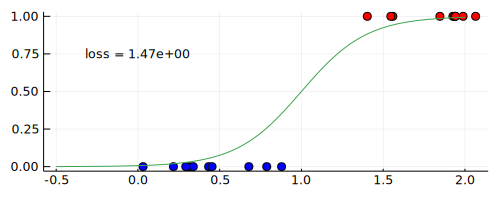

In [2]:
n = 10
blues = rand(n)
reds = 1.2 .+ rand(n)
r(α, β, x) = 1/(1 + exp(-α - β'*x))
loss(blues, reds, α, β) = sum(log(1/r(α,β,x)) for x in reds) + sum(log(1/(1-r(α,β,x))) for x in blues)
scatter([(b,0) for b in blues], legend = false, size = (500,200), color = :blue, fontfamily = "Palatino")
scatter!([(r,1) for r in reds], color = :red)
α, β = -5, 5
plot!(-0.5:0.001:2, x -> r(α, β, x))
prettyprint(x) = @sprintf("%.2e", x)
annotate!([(0, 0.75, text("loss = " * prettyprint(loss(blues, reds, α, β)),8))])

---

## Problem 5

What would be the problems with building a logistic classifier for the Iris dataset by training separate logistic regression models from each class (which are trained to distinguish members of that class by non-members)? For simplicity, suppose we're using just the petal and sepal lengths. 

In [4]:
df = CSV.read("iris.csv");

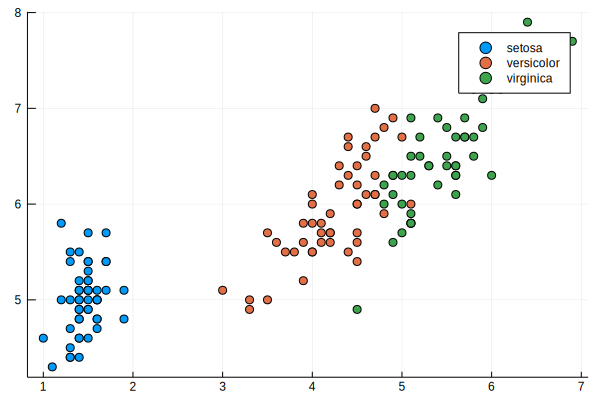

In [5]:
@df df scatter(:PetalLength, :SepalLength, group = :Species)

---

## Problem 6

Generate some synthetic three-class data for which a logistic regression classifier (again, consisting of three models which are trained to distinguish members of each class by from non-members) would be effective. Train the models and make a heatmap of the resulting prediction function.